## Xarray

### N-D labeled arrays and datasets in Python

Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”) are an essential part of computational science. They are encountered in a wide range of fields, including physics, astronomy, geoscience, bioinformatics, engineering, finance, and deep learning.

<img src="img/Screenshot 2023-11-23 073827.png" alt="xarray" style="width: 80%; height: 80%;">



- Xarray is an open source Python package that makes working with labeled **multi-dimensional arrays** simple, efficient, and fun! 
- **It extends NumPy by adding labels to arrays, making it easier to work with scientific data.**
- Xarray doesn’t just keep track of labels on arrays – it uses them to provide a powerful and concise interface.

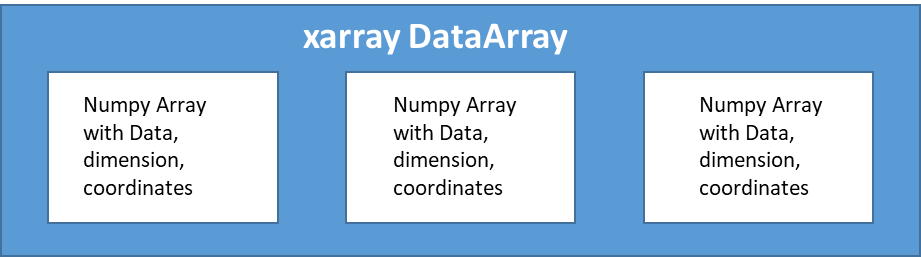

#### Key Features & Capabilities

| Feature                | Description                                                                                                        |
|------------------------|--------------------------------------------------------------------------------------------------------------------|
| Dimension names        | Xarray arrays have dimension names, making it easier to understand and manipulate data.                         |
| Coordinates            | Xarray arrays also support coordinates, which are values corresponding to each element of the array.             |
| Attributes             | Xarray arrays can have attributes, storing key-value pairs for additional data information.                      |
| Intuitive syntax       | Xarray's syntax is designed to be intuitive and easy to understand. You can conveniently select subsets of data. |
| Efficient operations   | Xarray operations are vectorized, efficiently performed on the entire dataset, saving processing time.            |
| Flexible data structures | Xarray supports various data structures, simplifying work with different types of data.                          |
| Integration with other libraries | Xarray integrates seamlessly with Python libraries like NumPy, Pandas, and Matplotlib.                   |


### Core data structures

Xarray has two core data structures, which build upon and extend the core strengths of `NumPy` and `pandas`. Both data structures are fundamentally N-dimensional:

- `DataArray`: 
  - A `DataArray` in xarray is a labeled, multi-dimensional array.
  - It consists of `data`, `dimensions`, and `coordinates`. 
  - The data is the actual array of values, dimensions define the axes of the array, and coordinates are labels for the values along each axis.
- `Dataset`: 
  - A Dataset is a container for one or more DataArrays. It is used to organize and label multi-dimensional arrays.
  - While a DataArray is suitable for a single variable, a Dataset can hold multiple variables, each represented by a DataArray.
  - Datasets provide a convenient way to work with and analyze multiple related arrays together.


| Feature                | DataArray                                            | Dataset                                                  |
|------------------------|------------------------------------------------------|----------------------------------------------------------|
| Dimensions             | A fixed number of dimensions.                        | Can have a variable number of dimensions.               |
| Coordinates            | Can have coordinates corresponding to each element. | Coordinates are shared by all DataArrays in the Dataset. |
| Attributes             | Can have attributes storing additional information. | Attributes are shared by all DataArrays in the Dataset.  |
| Operations             | Vectorized operations on all data at once.          | Vectorized operations, potentially involving multiple DataArrays. |
| Integration with other libraries | Can be integrated with Python libraries like NumPy, Pandas, and Matplotlib. | Integration with other libraries can be more complex due to multiple DataArrays. |

### NOTE
- **Dimensions:**
   - Dimensions are the named axes of a DataArray or Dataset.
   - For example, in a 2D array representing temperature data over time, you might have dimensions like "time" and "temperature."
   - Dimensions are labels for the different axes along which the data is organized.

- **Coordinates:**
   - Coordinates are labels or values associated with dimensions.
   - They provide context and meaning to the data by associating each data point with specific positions along each axis.
   - Coordinates can be numeric values, strings, or even dates and times, depending on the nature of the data.

- **Attributes:**
   - Attributes are metadata that can be attached to a DataArray or Dataset.
   - These can include information such as units, descriptions, or any other relevant details about the data.
   - Attributes enhance the interpretability of the data and are useful for documentation.

**Example:**
   - Consider a 2D DataArray representing temperature data with dimensions "latitude" and "longitude." The coordinates for these dimensions could be arrays of actual latitude and longitude values.
   - Additionally, the DataArray might have attributes like units ("degrees Celsius") and a description of the data source.

### Example

Here are some examples of how `DataArrays` and `Datasets` can be used:

* You can use a DataArray to store temperature data for a single location over time.
* You can use a Dataset to store temperature data for multiple locations over time.
* You can use a DataArray to store the results of a scientific simulation.
* You can use a Dataset to store the results of multiple scientific simulations.
* You can use a DataArray to visualize data with Matplotlib.
* You can use a Dataset to visualize data with Seaborn.

Here's a simple example of creating a DataArray in xarray:

```python
import xarray as xr
import numpy as np

# Create a DataArray
data = np.random.randn(3, 4)  # Random 3x4 array
dims = ('x', 'y')             # Dimensions
coords = {'x': [1, 2, 3], 'y': [10, 20, 30, 40]}  # Coordinates

da = xr.DataArray(data, dims=dims, coords=coords)
print(da)
```

This creates a 3x4 DataArray with dimensions 'x' and 'y', along with corresponding coordinates. Understanding and manipulating these concepts is crucial for effectively working with xarray and handling multi-dimensional data in a labeled and meaningful way.

### Difference between the Numpy array and xarray dataarray:

Here's a table summarizing the key differences between NumPy arrays and xarray DataArrays:

| Feature                  | NumPy Array                                       | xarray DataArray                                        |
|--------------------------|---------------------------------------------------|---------------------------------------------------------|
| **Labeled Dimensions**   | No labeled dimensions. Indexing is by integers.   | Labeled dimensions provide a clear and meaningful structure. |
| **Coordinates and Metadata** | Limited support for attaching metadata.      | Supports attaching coordinates and attributes, enhancing data context. |
| **Dataset Support**      | Standalone arrays.                                | Supports Datasets for organizing and grouping multiple arrays. |
| **Indexing with Labels**  | Indexing primarily with integer indices.         | Supports indexing with both integers and dimension labels. |
| **Concise Code**          | Code may require additional comments for clarity.| Labeled dimensions and coordinates lead to more readable code. |
| **Integration with Pandas** | Integration may require additional steps.     | Seamless integration with Pandas for labeled data analysis. |

This table provides a quick overview of the distinctions between NumPy arrays and xarray DataArrays in terms of key features and functionality. Keep in mind that the choice between them depends on the specific requirements of your data and the tasks you are performing.

In [15]:
import numpy as np
import xarray as xr

# NumPy array
numpy_array = np.random.randn(3, 4)

# xarray DataArray
xarray_dataarray = xr.DataArray(numpy_array, dims=('x', 'y'), coords={'x': [1, 2, 3], 'y': [10, 20, 30, 40]})

print("NumPy Array:")
print(numpy_array)
print("\n xarray DataArray:")
print(xarray_dataarray)


NumPy Array:
[[ 0.49953567  0.8713986   1.0847527   0.17523204]
 [-0.44126136  0.54712813 -0.20785281  2.32008015]
 [-1.89871025 -1.58761542 -0.9991557   0.45826235]]

 xarray DataArray:
<xarray.DataArray (x: 3, y: 4)>
array([[ 0.49953567,  0.8713986 ,  1.0847527 ,  0.17523204],
       [-0.44126136,  0.54712813, -0.20785281,  2.32008015],
       [-1.89871025, -1.58761542, -0.9991557 ,  0.45826235]])
Coordinates:
  * x        (x) int32 1 2 3
  * y        (y) int32 10 20 30 40


### Xarray dependencies 
(If you are using pip to install xarray, optional dependencies can be installed by specifying extras. Instructions for both pip and conda are given below.)

- **Required dependencies:** Python (3.9 or later), numpy (1.21 or later), packaging (21.3 or later), pandas (1.4 or later)
- **Optional dependencies:**

    - **netCDF4:** recommended if you want to use xarray for reading or writing netCDF files

    - **scipy:** used as a fallback for reading/writing netCDF3

    - **pydap:** used as a fallback for accessing OPeNDAP

    - **h5netcdf:** an alternative library for reading and writing netCDF4 files that does not use the netCDF-C libraries

    - **PyNIO:** for reading GRIB and other geoscience specific file formats. Note that PyNIO is not available for Windows and that the PyNIO backend may be moved outside of xarray in the future.

    - **zarr:** for chunked, compressed, N-dimensional arrays.

    - **cftime:** recommended if you want to encode/decode datetimes for non-standard calendars or dates before year 1678 or after year 2262.

    - **PseudoNetCDF:** recommended for accessing CAMx, GEOS-Chem (bpch), NOAA ARL files, ICARTT files (ffi1001) and many other.

    - **iris:** for conversion to and from iris’ Cube objects

- **For accelerating xarray:**

    - **scipy:** necessary to enable the interpolation features for xarray objects
    - **bottleneck:** speeds up NaN-skipping and rolling window aggregations by a large factor
    - **numbagg:** for exponential rolling window operations
- **For parallel computing:**
  - **dask.array:** required for Parallel computing with Dask.

- **For plotting:** 
  - **matplotlib:** required for Plotting
  - **cartopy:** recommended for Maps
  - **seaborn:** for better color palettes
  - **nc-time-axis:** for plotting cftime.datetime objects

### Installation: 

To install xarray and it's dependcncies.

`pip install xarray dask netCDF4 bottleneck -q`

In [1]:
%pip install xarray dask netCDF4 bottleneck -q

Note: you may need to restart the kernel to use updated packages.


## Importing important libraries

In [2]:
%pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import xarray as xr

### Create a DataArray

In [4]:
np.random.randn(2, 3) 

array([[-0.2008612 ,  1.87354867,  0.04170713],
       [ 0.45095348, -2.27422139, -1.24409338]])

In [5]:
data = xr.DataArray(
    np.random.randn(2, 3), #  generates a 2x3 array of random numbers sampled from a standard normal distribution. 
    dims=("x", "y"), 
    coords={"x": [10, 20]}
    )

data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.0065887 ,  0.38573199,  0.16657345],
       [-2.51872045,  1.141055  ,  0.36301966]])
Coordinates:
  * x        (x) int32 10 20
Dimensions without coordinates: y

In this case, a 2D array, assigned the names x and y to the two dimensions respectively and associated two coordinate labels ‘10’ and ‘20’ with the two locations along the x dimension. 

In [23]:
data.values

array([[-1.06363162, -1.19813606, -1.58878695],
       [-0.71194045,  0.32420941, -0.7814277 ]])

In [24]:
data.dims

('x', 'y')

In [25]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [26]:
data[0, :]

<xarray.DataArray (y: 3)>
array([-1.06363162, -1.19813606, -1.58878695])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [34]:
data.loc[10]

<xarray.DataArray (y: 3)>
array([-1.06363162, -1.19813606, -1.58878695])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

### Create a Dataset

In [36]:
dict(foo=data, bar=("x", [1, 2]), baz=np.pi)

{'foo': <xarray.DataArray (x: 2, y: 3)>
 array([[-1.06363162, -1.19813606, -1.58878695],
        [-0.71194045,  0.32420941, -0.7814277 ]])
 Coordinates:
   * x        (x) int64 10 20
 Dimensions without coordinates: y,
 'bar': ('x', [1, 2]),
 'baz': 3.141592653589793}

In [35]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1, 2]), baz=np.pi))

ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 -1.064 -1.198 -1.589 -0.7119 0.3242 -0.7814
    bar      (x) int64 1 2
    baz      float64 3.142

In [37]:
ds.to_netcdf("example.nc")

reopened = xr.open_dataset("example.nc")

reopened

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...

# Example



In [13]:
import numpy as np
import xarray as xr
import pandas as pd

# Create a time array ( the 'time' variable will contain a pandas datetime index starting from "2023-01-01" with daily intervals for 30 periods, starting from 2023/01/01 to 2023/01/30)
time = pd.date_range("2023-01-01", periods=30, freq="D")

# Create a latitude array
latitude = np.arange(30, 40, 1)

# Create random temperature values
temperature_data = np.random.randn(len(time), len(latitude))

# Create a DataArray with coordinates
temperature = xr.DataArray(
    temperature_data,
    dims=("time", "latitude"),
    coords={"time": time, "latitude": latitude},
    name="temperature",
    attrs={"units": "Celsius"},
)

# Print the created DataArray
print(temperature)


<xarray.DataArray 'temperature' (time: 30, latitude: 10)>
array([[ 0.71531135,  0.08286572, -1.47115016,  0.73427392, -0.57550121,
        -1.63220885,  1.1629017 ,  0.3228412 ,  0.11389621,  1.56773519],
       [-0.34849815,  1.98115927,  1.07959008, -0.75101284,  1.21240357,
        -1.00761452, -0.29699259, -0.2150417 , -1.17387695, -0.14501045],
       [-2.07006557, -1.92050754,  1.34739462, -0.2432936 , -0.8483572 ,
        -0.64933036,  0.4691935 ,  0.53997944,  0.93282311, -0.73163209],
       [-0.11056493, -1.07159034, -0.28141383,  1.06291583,  0.70375223,
        -1.54950518, -0.34740576,  0.28142048,  0.78573041,  1.4236208 ],
       [ 0.41903862, -0.18254706, -0.10139026, -0.32009202, -0.96959243,
         1.48694725, -0.71085583, -0.18803071, -0.51088417, -0.96000474],
       [-0.3878444 , -0.10160057, -0.08755246, -0.69725792, -0.31231378,
        -1.07544273,  0.98013889,  1.02535988,  0.76247377,  0.12642722],
       [ 1.49952695,  1.11883348,  0.81115745,  0.4580049 , 

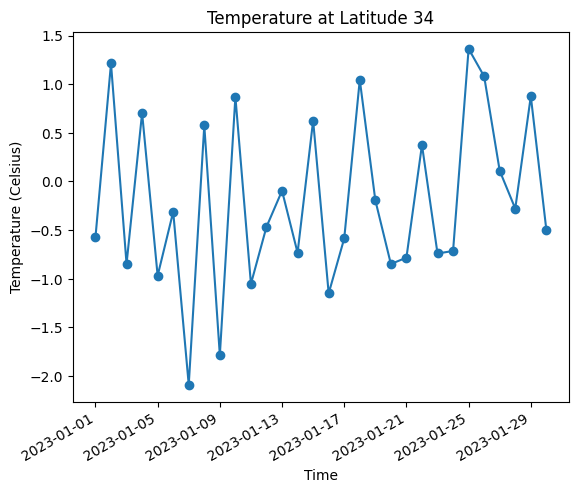

In [14]:
import matplotlib.pyplot as plt

# Choose a latitude for plotting
selected_latitude = 34

# Select the temperature values for the chosen latitude
temperature_at_latitude = temperature.sel(latitude=selected_latitude)

# Plotting
temperature_at_latitude.plot.line(x='time', marker='o')
plt.title(f'Temperature at Latitude {selected_latitude}')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.show()


### Refrence

- https://xarray.dev/blog/flox
- https://registry.opendata.aws/nwm-archive/
- https://xarray.dev/
- https://docs.xarray.dev/en/stable/getting-started-guide/faq.html
- https://coderzcolumn.com/tutorials/python/xarray-dataset-multi-dimensional-labelled-arrays